## Imports

In [221]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from function import Eddies_Tools
import numpy as np

from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler

## EDA/Cleaning

In [2]:
trade_chat = pd.read_csv('data\\trade_chat_v3.csv', index_col=0)

In [3]:
trade_chat 

,date,time,text,sentiment,target
0,2/22/2022,8:14:35 AM,how long will downtime be,Other,Patch
1,2/22/2022,8:14:40 AM,8 hours,Other,Patch
2,2/22/2022,8:14:42 AM,few hours,Other,Patch
3,2/22/2022,8:14:42 AM,8 hours?,Negative,Patch
4,2/22/2022,8:14:42 AM,7hrs,Other,Patch
...,...,...,...,...,...
4444,2/23/2022,10:21:11 PM,WTS +15 With my team 2500 io Timed!,Other,Boost
4445,2/23/2022,10:21:45 PM,<Guild Offering> CHEAPEST Mythic/Heroic [Sanc...,Other,Boost
2717,2/23/2022,2:49:47 PM,heroic also so I don't screw up your count,Other,Chat
4447,2/23/2022,10:23:12 PM,wts Strange Goop 250k no need of ah get it ch...,Other,Trade


In [4]:
trade_chat.target.value_counts()

Chat     992
Boost    750
Patch    713
LFM      688
Game     640
Trade    484
LFG      150
Bug       32
Name: target, dtype: int64

In [5]:
trade_chat.sentiment.value_counts()

Other       3883
Negative     566
Name: sentiment, dtype: int64

In [6]:
trade_chat['text'].duplicated().value_counts()

False    2851
True     1598
Name: text, dtype: int64

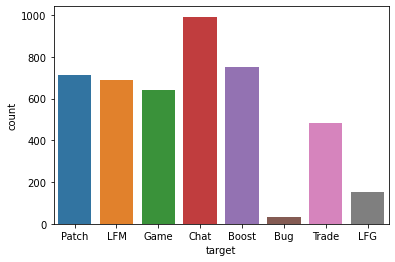

In [7]:
sns.countplot(x='target', data= trade_chat);

In [8]:
trade_chat.drop_duplicates(subset= 'text', inplace=True)
trade_chat.reset_index(drop=True, inplace=True)

In [10]:
trade_chat['text'].duplicated().value_counts()

False    2851
Name: text, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

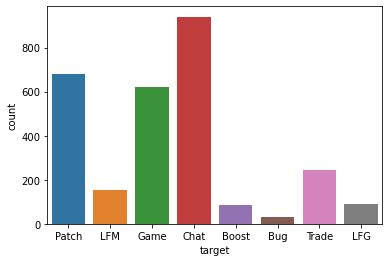

In [9]:
sns.countplot(x='target', data= trade_chat)

In [11]:
patch = trade_chat[trade_chat.target == 'Patch']
chat = trade_chat[trade_chat.target == 'Chat']
game = trade_chat[trade_chat.target == 'Game']

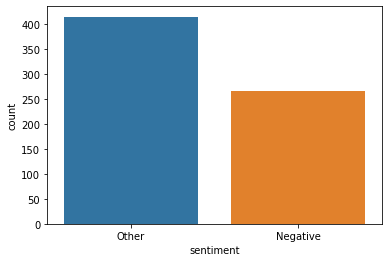

In [12]:
sns.countplot(x='sentiment', data= patch);

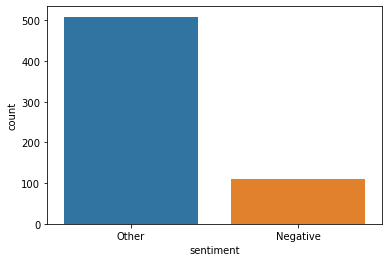

In [13]:
sns.countplot(x='sentiment', data= game);

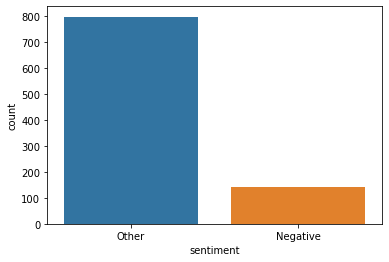

In [14]:
sns.countplot(x='sentiment', data= chat);

In [15]:
patch.sentiment.value_counts()

Other       415
Negative    267
Name: sentiment, dtype: int64

In [16]:
game.sentiment.value_counts()

Other       509
Negative    110
Name: sentiment, dtype: int64

In [17]:
chat.sentiment.value_counts()

Other       799
Negative    141
Name: sentiment, dtype: int64

## NLP

In [49]:
et = Eddies_Tools()

In [50]:
s_words = stopwords.words('english')
# tokenizer = RegexpTokenizer(r"(?u)\b\w\w+\b")
tokenizer = RegexpTokenizer(r"(?u)\b([a-z]+|9.2)\w*\b")
et = Eddies_Tools()

In [51]:
s_words.append('u')
s_words.append('ur')
s_words.append('im')
s_words.append('dont')
s_words.append('thats')

In [52]:
if "thats" in s_words:
    print(True)

True


In [53]:
tc_tokenized = et.nlp_tokenizer(trade_chat, tokenizer, s_words)

In [54]:
tc_tokenized

,date,time,text,sentiment,target,text_tokenized,joined_tokens
0,2/22/2022,8:14:35 AM,how long will downtime be,Other,Patch,"[long, downtime]",long downtime
1,2/22/2022,8:14:40 AM,8 hours,Other,Patch,[hours],hours
2,2/22/2022,8:14:42 AM,few hours,Other,Patch,[hours],hours
3,2/22/2022,8:14:42 AM,8 hours?,Negative,Patch,[hours],hours
4,2/22/2022,8:14:42 AM,7hrs,Other,Patch,[other],other
...,...,...,...,...,...,...,...
2846,2/23/2022,10:16:11 PM,lfm antorus first 2 last 2 only,Other,Game,"[lfm, antorus, first, last]",lfm antorus first last
2847,2/23/2022,11:15:51 AM,afternoon,Other,Chat,[afternoon],afternoon
2848,2/23/2022,10:21:11 PM,wts +15 with my team 2500 io timed!,Other,Boost,"[wts, team, io, timed]",wts team io timed
2849,2/23/2022,2:49:47 PM,heroic also so i don't screw up your count,Other,Chat,"[heroic, also, screw, count]",heroic also screw count


In [55]:
counter = 0

for i, lists in enumerate(tc_tokenized.text_tokenized):
    if lists == []:
        counter += 1

counter

0

In [56]:
chat_tokenized = tc_tokenized[tc_tokenized.target == 'Chat']
patch_tokenized = tc_tokenized[tc_tokenized.target == 'Patch']
game_tokenized = tc_tokenized[tc_tokenized.target == 'Game']

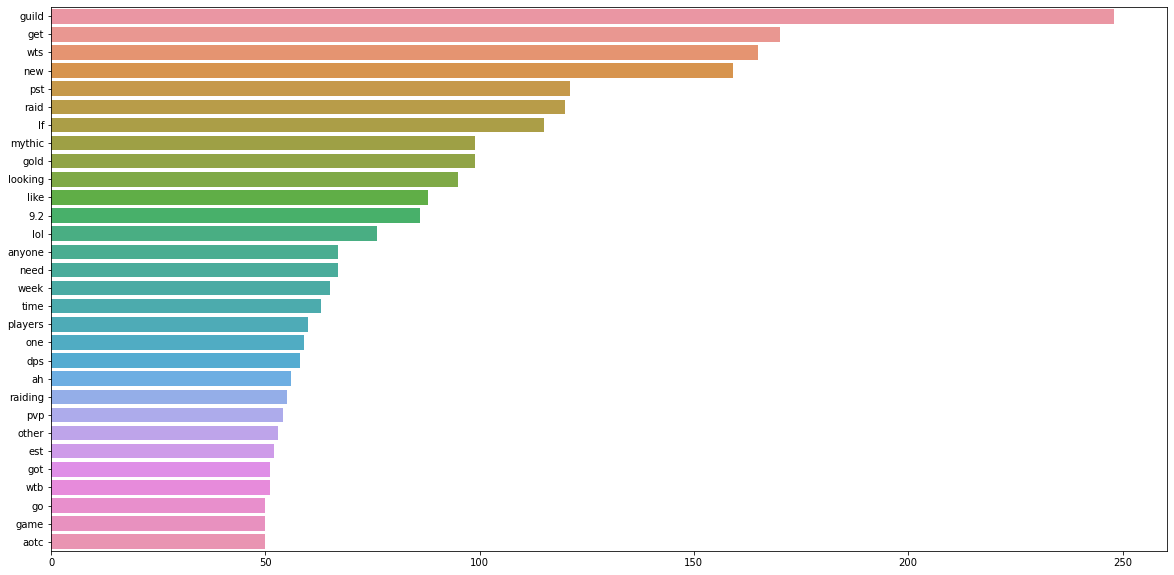

In [57]:
fdist = FreqDist(tc_tokenized.text_tokenized.explode())

top_30_words = list(zip(*fdist.most_common(30)))

tokens = np.array(top_30_words[0])
count = np.array(top_30_words[1])

fig, ax = plt.subplots(figsize=(20,10))

top_30_chart = sns.barplot(x= count, y= tokens)


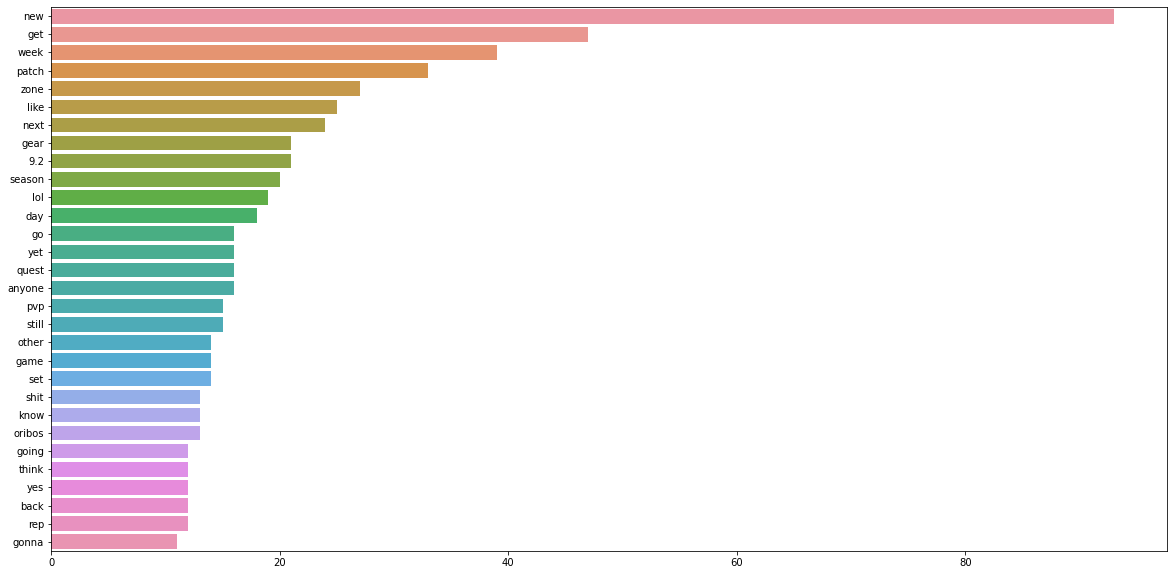

In [58]:
patch_fdist = FreqDist(patch_tokenized.text_tokenized.explode())

top_30_words = list(zip(*patch_fdist.most_common(30)))

tokens = np.array(top_30_words[0])
count = np.array(top_30_words[1])

fig, ax = plt.subplots(figsize=(20,10))

top_30_chart = sns.barplot(x= count, y= tokens)

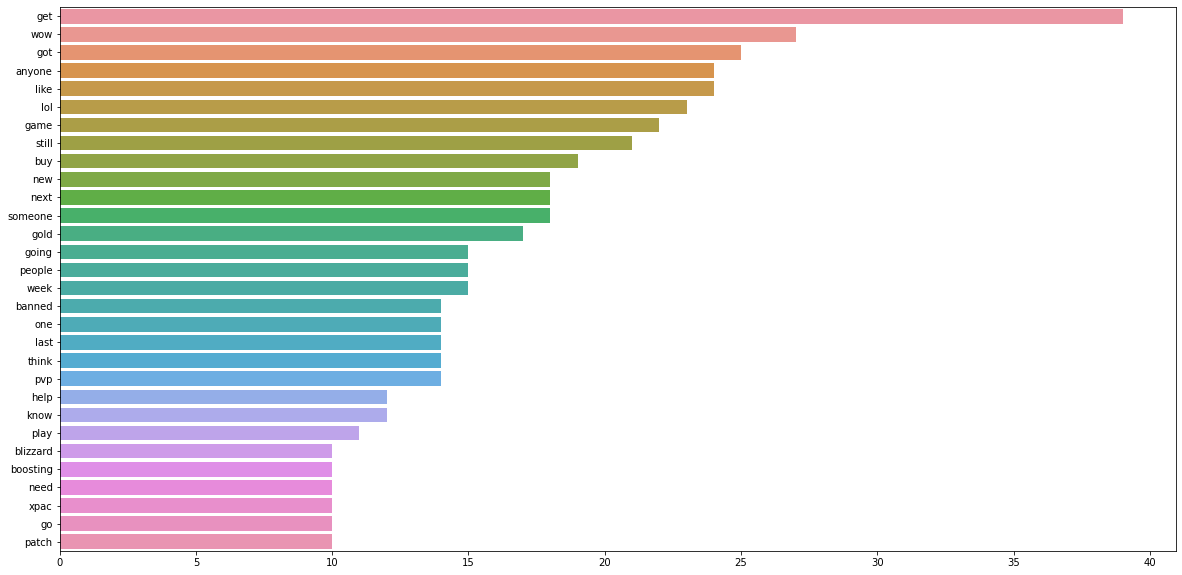

In [59]:
game_fdist = FreqDist(game_tokenized.text_tokenized.explode())

top_30_words = list(zip(*game_fdist.most_common(30)))

tokens = np.array(top_30_words[0])
count = np.array(top_30_words[1])

fig, ax = plt.subplots(figsize=(20,10))

top_30_chart = sns.barplot(x= count, y= tokens)

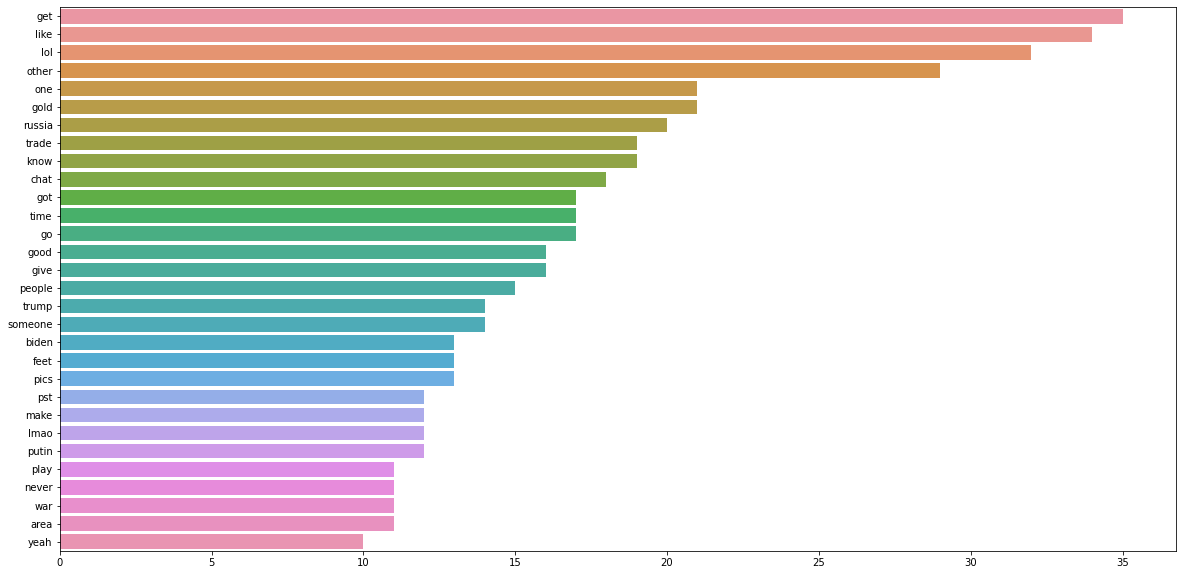

In [60]:
chat_fdist = FreqDist(chat_tokenized.text_tokenized.explode())

top_30_words = list(zip(*chat_fdist.most_common(30)))

tokens = np.array(top_30_words[0])
count = np.array(top_30_words[1])

fig, ax = plt.subplots(figsize=(20,10))

top_30_chart = sns.barplot(x= count, y= tokens)

In [61]:
neg_patch = patch_tokenized[patch_tokenized.sentiment == 'Negative']
neg_chat = chat_tokenized[chat_tokenized.sentiment == 'Negative']
neg_game = game_tokenized[game_tokenized.sentiment == 'Negative']
other_patch = patch_tokenized[patch_tokenized.sentiment == 'Other']
other_chat = chat_tokenized[chat_tokenized.sentiment == 'Other']
other_game = game_tokenized[game_tokenized.sentiment == 'Other']

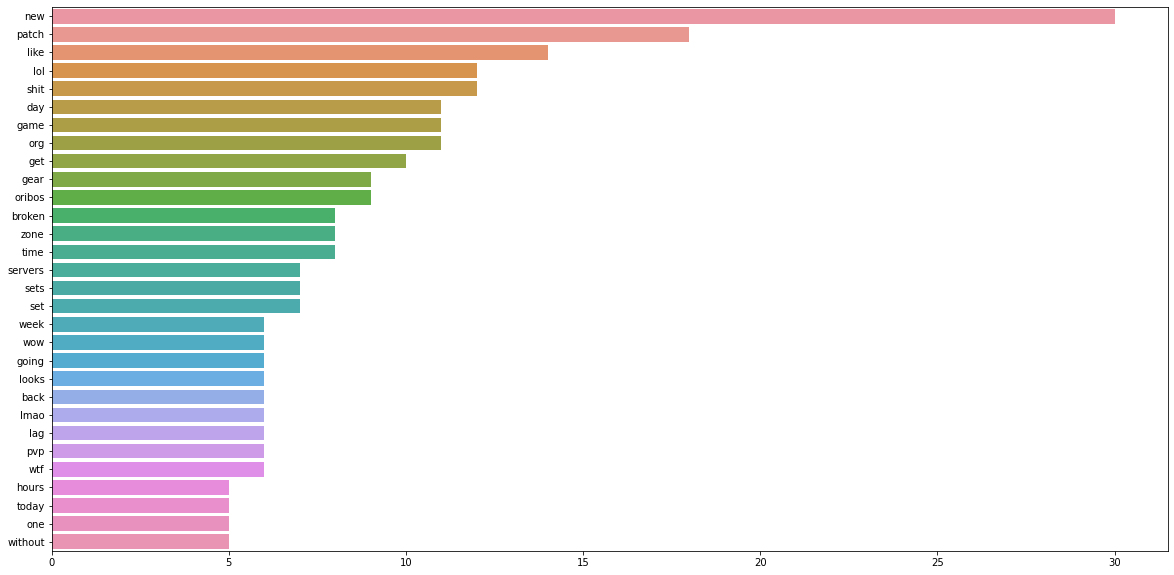

In [62]:
neg_patch_fdist = FreqDist(neg_patch.text_tokenized.explode())

top_30_words = list(zip(*neg_patch_fdist.most_common(30)))

tokens = np.array(top_30_words[0])
count = np.array(top_30_words[1])

fig, ax = plt.subplots(figsize=(20,10))

top_30_chart = sns.barplot(x= count, y= tokens)

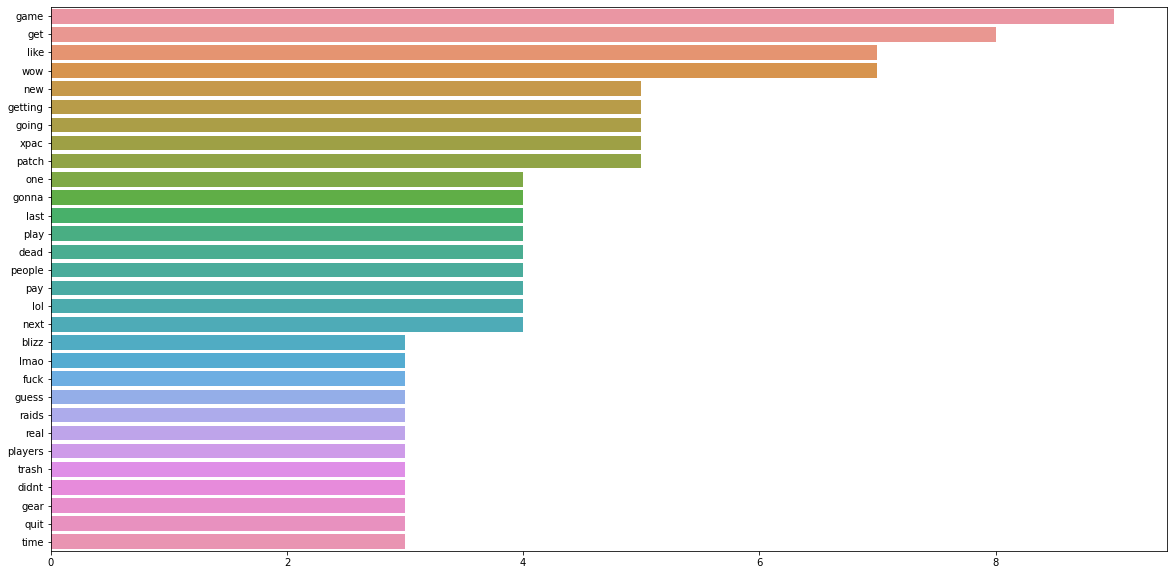

In [63]:
neg_game_fdist = FreqDist(neg_game.text_tokenized.explode())

top_30_words = list(zip(*neg_game_fdist.most_common(30)))

tokens = np.array(top_30_words[0])
count = np.array(top_30_words[1])

fig, ax = plt.subplots(figsize=(20,10))

top_30_chart = sns.barplot(x= count, y= tokens)

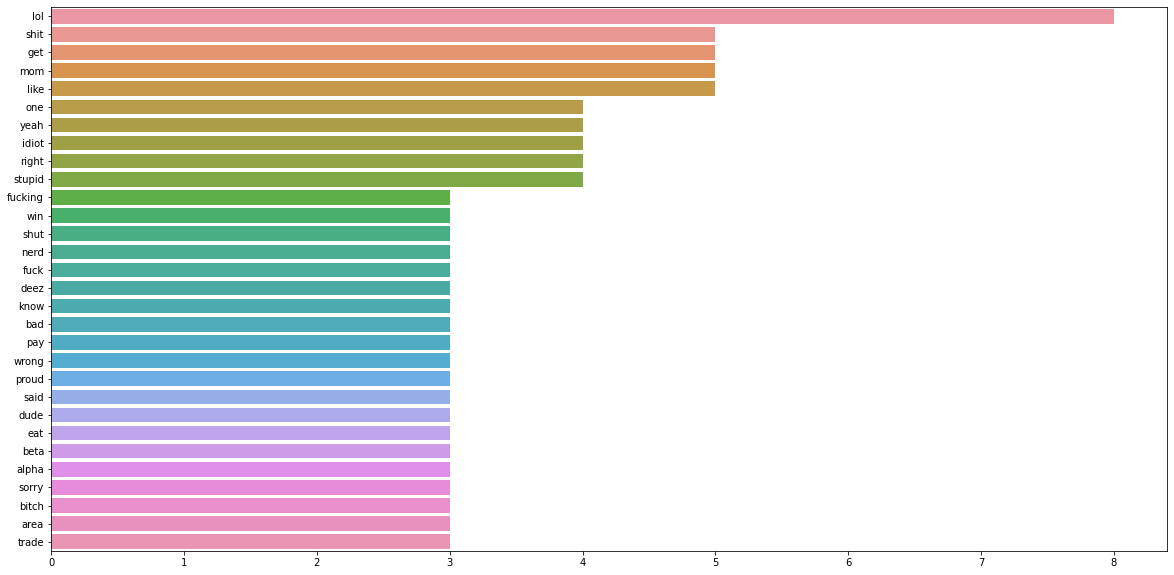

In [64]:
neg_chat_fdist = FreqDist(neg_chat.text_tokenized.explode())

top_30_words = list(zip(*neg_chat_fdist.most_common(30)))

tokens = np.array(top_30_words[0])
count = np.array(top_30_words[1])

fig, ax = plt.subplots(figsize=(20,10))

top_30_chart = sns.barplot(x= count, y= tokens)

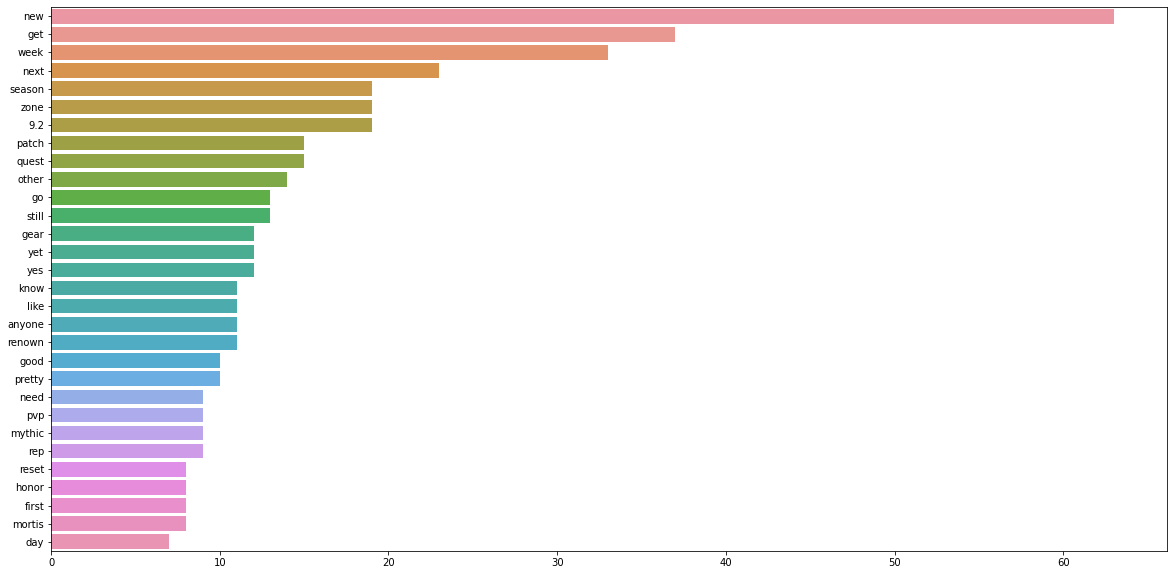

In [65]:
other_patch_fdist = FreqDist(other_patch.text_tokenized.explode())

top_30_words = list(zip(*other_patch_fdist.most_common(30)))

tokens = np.array(top_30_words[0])
count = np.array(top_30_words[1])

fig, ax = plt.subplots(figsize=(20,10))

top_30_chart = sns.barplot(x= count, y= tokens)

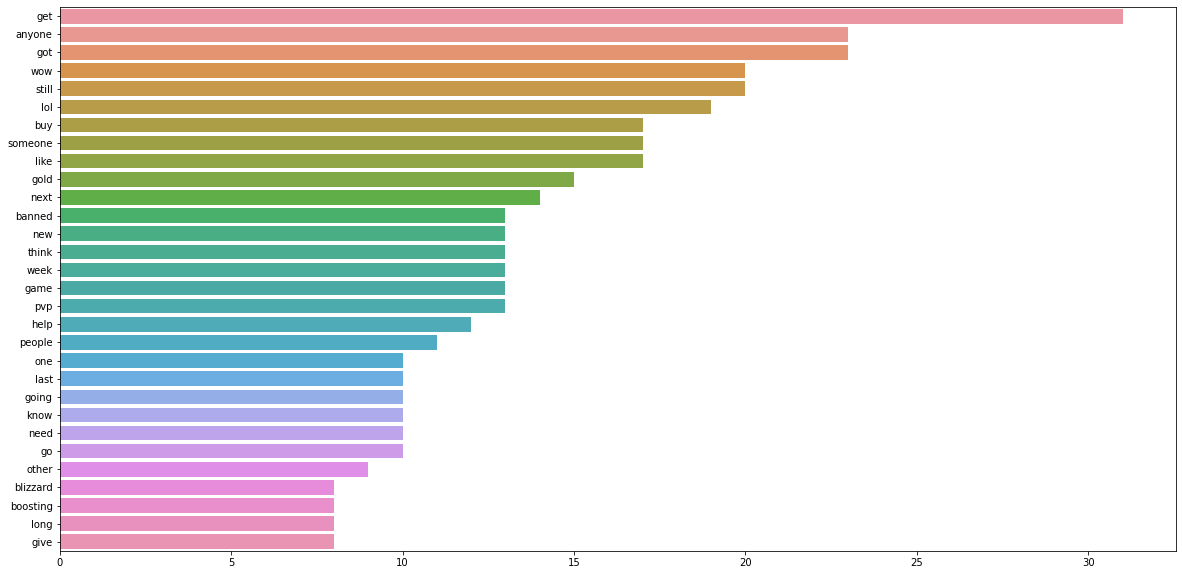

In [66]:
other_game_fdist = FreqDist(other_game.text_tokenized.explode())

top_30_words = list(zip(*other_game_fdist.most_common(30)))

tokens = np.array(top_30_words[0])
count = np.array(top_30_words[1])

fig, ax = plt.subplots(figsize=(20,10))

top_30_chart = sns.barplot(x= count, y= tokens)

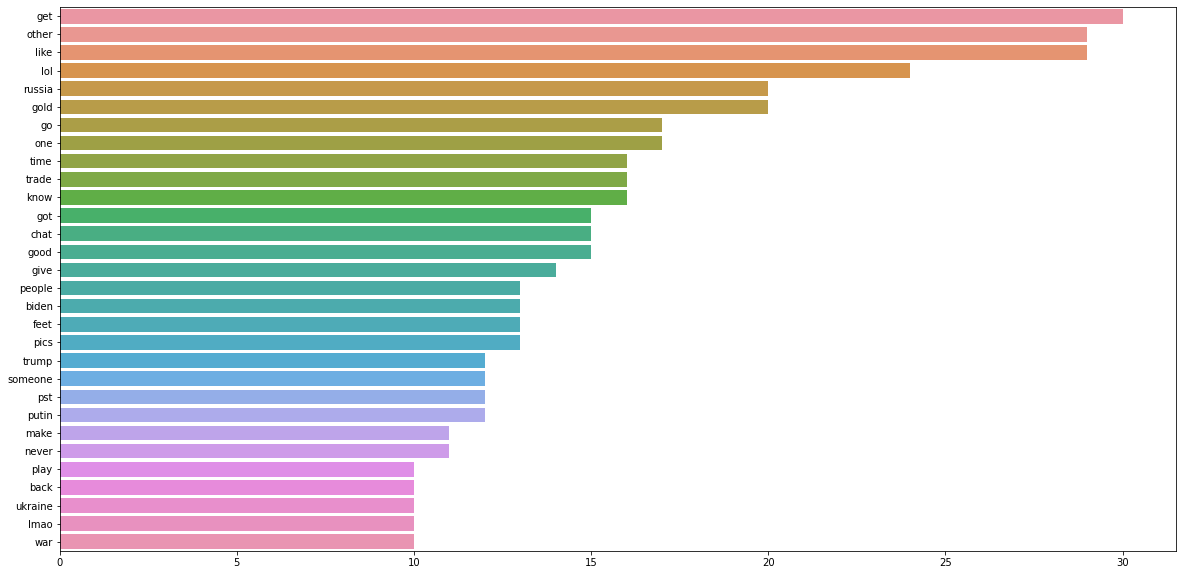

In [67]:
other_chat_fdist = FreqDist(other_chat.text_tokenized.explode())

top_30_words = list(zip(*other_chat_fdist.most_common(30)))

tokens = np.array(top_30_words[0])
count = np.array(top_30_words[1])

fig, ax = plt.subplots(figsize=(20,10))

top_30_chart = sns.barplot(x= count, y= tokens)

## Baseline Models

In [226]:
X = tc_tokenized['joined_tokens']
y_sentiment = tc_tokenized['sentiment']
y_target = tc_tokenized['target']

In [227]:
def downsample(df:pd.DataFrame, label_col_name:str) -> pd.DataFrame:
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    return (df
            # split the dataframe per group
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombine the dataframes
            .reset_index(drop=True)
            )

In [228]:
copy_tc_df = tc_tokenized.copy()

undersampled_df = downsample(copy_tc_df,'sentiment')

In [230]:
undersampled_df.sentiment.value_counts()

Negative    545
Other       545
Name: sentiment, dtype: int64

In [231]:
X = undersampled_df['joined_tokens']
y_sentiment = undersampled_df['sentiment']
y_target = undersampled_df['target']

### Sentiment Models

In [232]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y_sentiment, test_size= 0.25, random_state=5)

In [234]:
y_test_s.value_counts()

Other       138
Negative    135
Name: sentiment, dtype: int64

In [235]:
y_test_s.value_counts(normalize=True)

Other       0.505495
Negative    0.494505
Name: sentiment, dtype: float64

In [236]:
s_labels = ['Negative', 'Other']

In [237]:
sentiment_models = {}

#### SENTIMENT - Stochastic Gradient Descent Model

In [238]:
sgd_sentiment = Pipeline([('vect', CountVectorizer()), 
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier(random_state=5)),
              ])

cv_mean, accuracy, y_pred, sgd_sentiment = et.run_model(X, y_sentiment, sgd_sentiment)

print(f'CV Mean: {cv_mean}')
print(f'Accuracy: {accuracy}')

sentiment_models['SGD'] = {'CV Mean': cv_mean, 'Accuracy': accuracy}


CV Mean: 0.6622
Accuracy: 0.6557


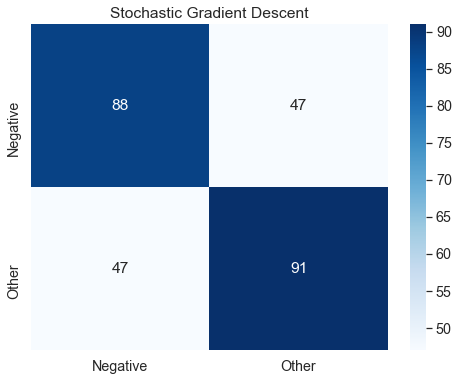

In [239]:
cm = confusion_matrix(y_test_s, y_pred)

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=s_labels, yticklabels=s_labels)
ax.set_title('Stochastic Gradient Descent');

#### SENTIMENT - Random Forest Model

In [177]:
rfc_sentiment = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier(random_state=5)),
              ])

cv_mean, accuracy, y_pred, rfc_sentiment = et.run_model(X, y_sentiment, rfc_sentiment)

print(f'CV Mean: {cv_mean}')
print(f'Accuracy: {accuracy}')

sentiment_models['RFC'] = {'CV Mean': cv_mean, 'Accuracy': accuracy}


CV Mean: 0.8204
Accuracy: 0.8219


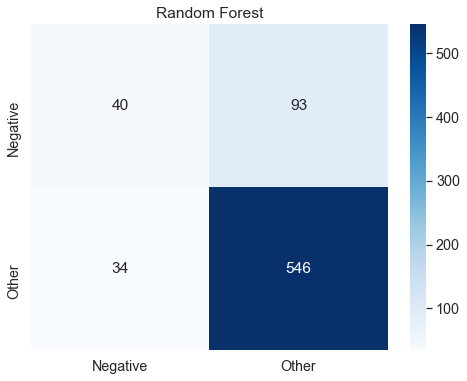

In [178]:
cm = confusion_matrix(y_test_s, y_pred)

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=s_labels, yticklabels=s_labels)
ax.set_title('Random Forest');

#### SENTIMENT - Naive Bayes Model

In [179]:
naive_sentiment = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

cv_mean, accuracy, y_pred, naive_sentiment = et.run_model(X, y_sentiment, naive_sentiment)

print(f'CV Mean: {cv_mean}')
print(f'Accuracy: {accuracy}')

sentiment_models['Naive'] = {'CV Mean': cv_mean, 'Accuracy': accuracy}


CV Mean: 0.8157
Accuracy: 0.8247


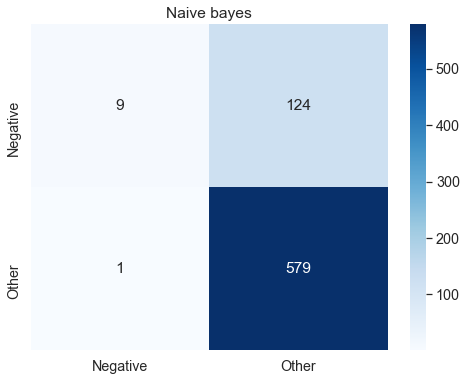

In [180]:
cm = confusion_matrix(y_test_s, y_pred)

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=s_labels, yticklabels=s_labels)
ax.set_title('Naive bayes');

#### SENTIMENT - Logistic Regression Model

In [183]:
lg_sentiment = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression(random_state=5)),
              ])

cv_mean, accuracy, y_pred, lg_sentiment = et.run_model(X, y_sentiment, lg_sentiment)

print(f'CV Mean: {cv_mean}')
print(f'Accuracy: {accuracy}')

sentiment_models['LogReg'] = {'CV Mean': cv_mean, 'Accuracy': accuracy}


CV Mean: 0.8171
Accuracy: 0.8177


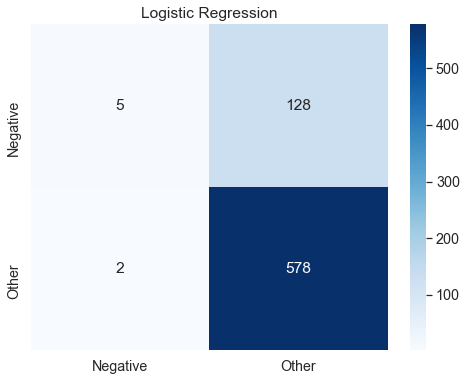

In [184]:
cm = confusion_matrix(y_test_s, y_pred)

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=s_labels, yticklabels=s_labels)
ax.set_title('Logistic Regression');

#### SENTIMENT - SVC Model

In [185]:
svc_sentiment = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SVC(random_state=5)),
              ])

cv_mean, accuracy, y_pred, svc_sentiment = et.run_model(X, y_sentiment, svc_sentiment)

print(f'CV Mean: {cv_mean}')
print(f'Accuracy: {accuracy}')

sentiment_models['SVC'] = {'CV Mean': cv_mean, 'Accuracy': accuracy}

CV Mean: 0.8195
Accuracy: 0.8163


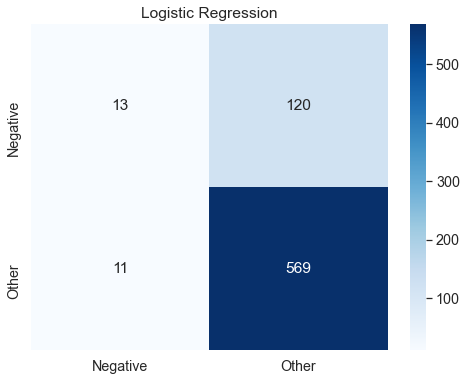

In [186]:
cm = confusion_matrix(y_test_s, y_pred)

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=s_labels, yticklabels=s_labels)
ax.set_title('Logistic Regression');

In [161]:
sentiment_models

{'SGD': {'CV Mean': 0.7942, 'Accuracy': 0.805},
 'RFC': {'CV Mean': 0.8204, 'Accuracy': 0.8219},
 'Naive': {'CV Mean': 0.8157, 'Accuracy': 0.8247},
 'LogReg': {'CV Mean': 0.8171, 'Accuracy': 0.8177},
 'SVC': {'CV Mean': 0.8195, 'Accuracy': 0.8163}}

### Target Models

In [249]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y_target, test_size= 0.25, random_state=5)

In [250]:
target_models = {}

In [251]:
y_test_t.value_counts()

Chat     92
Patch    89
Game     52
Trade    14
LFM      11
Bug       7
Boost     6
LFG       2
Name: target, dtype: int64

In [252]:
t_labels = sorted(list(tc_tokenized.target.value_counts().index))

#### TARGET - Stochastic Gradient Descent Model

In [253]:
sgd_target = Pipeline([('vect', CountVectorizer()), 
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier(random_state=5)),
              ])

cv_mean, accuracy, y_pred, sgd_target = et.run_model(X, y_target, sgd_target)

print(f'CV Mean: {cv_mean}')
print(f'Accuracy: {accuracy}')

target_models['SGD'] = {'CV Mean': cv_mean, 'Accuracy': accuracy}



CV Mean: 0.5521
Accuracy: 0.5348


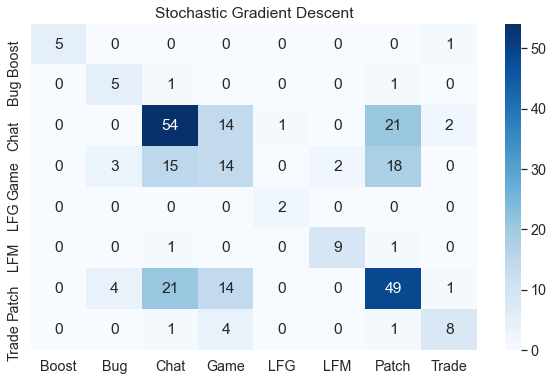

In [254]:
cm = confusion_matrix(y_test_t, y_pred)

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=t_labels, yticklabels=t_labels)
ax.set_title('Stochastic Gradient Descent');

#### TARGET - Random Forest Model

In [193]:
rfc_target = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier(random_state=5)),
              ])

cv_mean, accuracy, y_pred, rfc_target = et.run_model(X, y_target, rfc_target)

print(f'CV Mean: {cv_mean}')
print(f'Accuracy: {accuracy}')

target_models['RFC'] = {'CV Mean': cv_mean, 'Accuracy': accuracy}


CV Mean: 0.6146
Accuracy: 0.6564


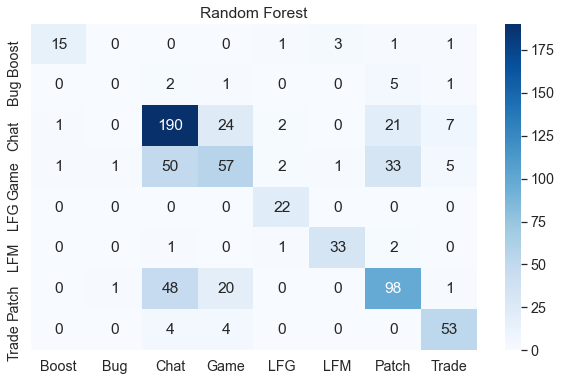

In [194]:
cm = confusion_matrix(y_test_t, y_pred)

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=t_labels, yticklabels=t_labels)
ax.set_title('Random Forest');

#### TARGET - Naive Bayes Model

In [195]:
naive_target = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

cv_mean, accuracy, y_pred, naive_target = et.run_model(X, y_target, naive_target)

print(f'CV Mean: {cv_mean}')
print(f'Accuracy: {accuracy}')

target_models['Naive'] = {'CV Mean': cv_mean, 'Accuracy': accuracy}

CV Mean: 0.6151
Accuracy: 0.6452


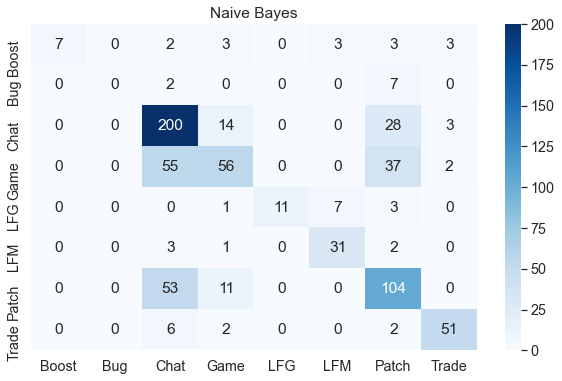

In [198]:
cm = confusion_matrix(y_test_t, y_pred)

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=t_labels, yticklabels=t_labels)
ax.set_title('Naive Bayes');

#### TARGET - Logistic Regression Model

In [200]:
lg_target = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression(random_state=5)),
              ])

cv_mean, accuracy, y_pred, lg_target = et.run_model(X, y_target, lg_target)

print(f'CV Mean: {cv_mean}')
print(f'Accuracy: {accuracy}')

target_models['LogReg'] = {'CV Mean': cv_mean, 'Accuracy': accuracy}

CV Mean: 0.6239
Accuracy: 0.6396


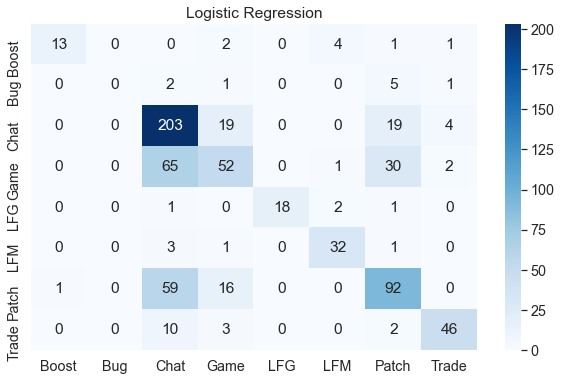

In [201]:
cm = confusion_matrix(y_test_t, y_pred)

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=t_labels, yticklabels=t_labels)
ax.set_title('Logistic Regression');

#### TARGET - SVC Model

In [202]:
svc_target = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SVC(random_state=5)),
              ])

cv_mean, accuracy, y_pred, svc_target = et.run_model(X, y_target, svc_target)

print(f'CV Mean: {cv_mean}')
print(f'Accuracy: {accuracy}')

target_models['SVC'] = {'CV Mean': cv_mean, 'Accuracy': accuracy}

CV Mean: 0.6188
Accuracy: 0.6438


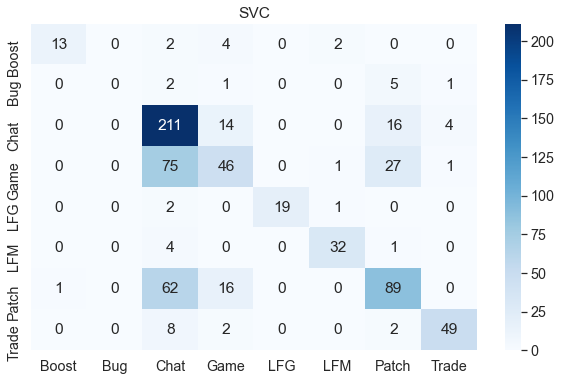

In [203]:
cm = confusion_matrix(y_test_t, y_pred)

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=t_labels, yticklabels=t_labels)
ax.set_title('SVC');

In [94]:
target_models

{'SGD': {'CV Mean': 0.6272, 'Accuracy': 0.6774},
 'RFC': {'CV Mean': 0.6146, 'Accuracy': 0.6564},
 'Naive': {'CV Mean': 0.6151, 'Accuracy': 0.6452},
 'LogReg': {'CV Mean': 0.6239, 'Accuracy': 0.6396}}

### Base Model Performance

In [204]:
s_model_df = pd.DataFrame()
s_bmp_labels = list(sentiment_models.keys())

In [205]:
model_list = []
cv_list = []
acc_list = []

for model_name in s_bmp_labels:
    cv_list.append(list(sentiment_models[model_name].values())[0])
    acc_list.append(list(sentiment_models[model_name].values())[1])

s_model_df['model'] = sentiment_models.keys()
s_model_df['cv_mean'] = cv_list
s_model_df['accuracy'] = acc_list

s_model_df


,model,cv_mean,accuracy
0,SGD,0.7942,0.8050
1,RFC,0.8204,0.8219
2,Naive,0.8157,0.8247
3,LogReg,0.8171,0.8177
4,SVC,0.8195,0.8163


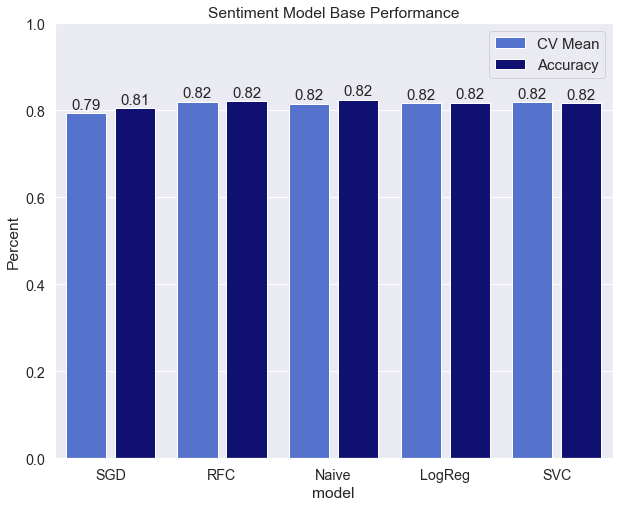

In [207]:
fig, ax = plt.subplots(figsize=(10,8))
width = .45
sns.set(font_scale = 1.3)

ax1 = sns.barplot(x='model', y='cv_mean', data=s_model_df, color='royalblue', label='CV Mean')

for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width)



ax2 = sns.barplot(x='model', y='accuracy', data=s_model_df, color='navy', label='Accuracy')

for bar in ax.containers[1]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (1- width))
    bar.set_width(w * width)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

ax.set_ylabel('Percent')
ax.set_ybound(upper= 1)
ax.legend(fontsize= 15)
ax.set_title('Sentiment Model Base Performance')


plt.show()

In [208]:
t_model_df = pd.DataFrame()
t_bmp_labels = list(target_models.keys())

In [209]:
model_list = []
cv_list = []
acc_list = []

for model_name in t_bmp_labels:
    cv_list.append(list(target_models[model_name].values())[0])
    acc_list.append(list(target_models[model_name].values())[1])

t_model_df['model'] = target_models.keys()
t_model_df['cv_mean'] = cv_list
t_model_df['accuracy'] = acc_list

t_model_df

,model,cv_mean,accuracy
0,SGD,0.6272,0.6774
1,RFC,0.6146,0.6564
2,Naive,0.6151,0.6452
3,LogReg,0.6239,0.6396
4,SVC,0.6188,0.6438


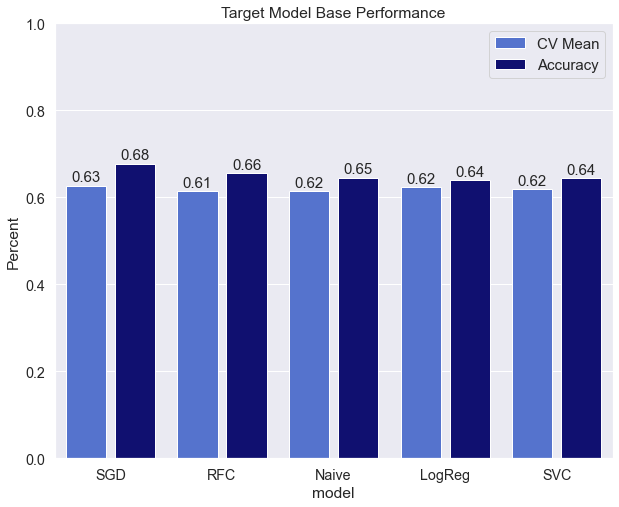

In [210]:
fig, ax = plt.subplots(figsize=(10,8))
width = .45
sns.set(font_scale = 1.3)

ax1 = sns.barplot(x='model', y='cv_mean', data=t_model_df, color='royalblue', label='CV Mean')

for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width)



ax2 = sns.barplot(x='model', y='accuracy', data=t_model_df, color='navy', label='Accuracy')

for bar in ax.containers[1]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (1- width))
    bar.set_width(w * width)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

ax.set_ylabel('Percent')
ax.set_ybound(upper= 1)
ax.legend(fontsize= 15)
ax.set_title('Target Model Base Performance')


plt.show()

## Tuned Models

### Sentiment Models

In [242]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y_sentiment, test_size= 0.25, random_state=5)

In [243]:
sentiment_models_t = {}

#### Stochastic Gradient Descent Model

In [244]:
sgd_sentiment = Pipeline([('vect', CountVectorizer()), 
                ('tfidf', TfidfTransformer()),
                ('sgd', SGDClassifier(random_state=5)),
               ])

sgd_sentiment.fit(X_train_s, y_train_s)

sgd_params = {
    'vect__strip_accents':[None,'ascii','unicode'],
    'vect__lowercase': [True, False],
    'vect__ngram_range': [(1,1), (1,2), (2,2)],
    'tfidf__smooth_idf': [True, False],
    'sgd__loss': ['hinge','log','modified_huber','squared_hinge'],
    'sgd__max_iter':[1000,2000],
    'sgd__class_weight': [None, 'balanced']
}

sgd_gs = GridSearchCV(sgd_sentiment,param_grid=sgd_params, cv=5, verbose=1, n_jobs=-3, scoring='accuracy')

sgd_gs = sgd_gs.fit(X_train_s, y_train_s)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-3)]: Done  30 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-3)]: Done 820 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-3)]: Done 2785 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-3)]: Done 2880 out of 2880 | elapsed:   14.9s finished


In [245]:
sgd_gs.best_score_

0.67198114619183

In [246]:
sgd_gs.best_params_

{'sgd__class_weight': None,
 'sgd__loss': 'hinge',
 'sgd__max_iter': 1000,
 'tfidf__smooth_idf': True,
 'vect__lowercase': True,
 'vect__ngram_range': (1, 2),
 'vect__strip_accents': None}

In [247]:
sgd_sentiment = Pipeline([('vect', CountVectorizer(ngram_range= (1,2))), 
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier(loss = 'hinge', random_state=5)),
              ])

cv_mean, accuracy, y_pred, sgd_sentiment = et.run_model(X, y_sentiment, sgd_sentiment)

print(f'CV Mean: {cv_mean}')
print(f'Accuracy: {accuracy}')

sentiment_models_t['SGD'] = {'CV Mean': cv_mean, 'Accuracy': accuracy}


CV Mean: 0.672
Accuracy: 0.6703


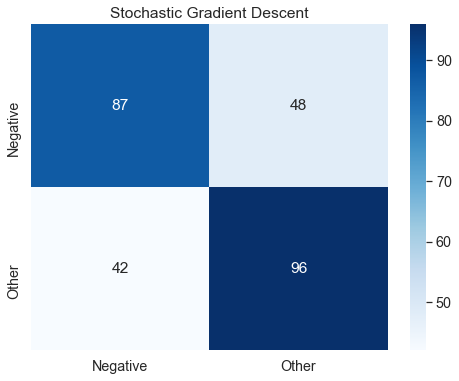

In [248]:
cm = confusion_matrix(y_test_s, y_pred)

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=s_labels, yticklabels=s_labels)
ax.set_title('Stochastic Gradient Descent');

#### Random Forest Model

In [ ]:
rfc_sentiment = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('rfc', RandomForestClassifier(random_state=5)),
              ])

rfc_sentiment.fit(X_train_s, y_train_s)

rfc_params = {
    'vect__strip_accents':[None,'ascii','unicode'],
    'vect__lowercase': [True, False],
    'vect__ngram_range': [(1,1), (1,2), (2,2)],
    'tfidf__smooth_idf': [True, False],
    'rfc__n_estimators': [100,200,300,400,500],
    'rfc__criterion': ['gini','entropy'],
    'rfc__max_depth': [1,3,5],
    'rfc__class_weight': [None,'balanced', 'balanced_subsample']
}

rfc_gs = GridSearchCV(rfc_sentiment, param_grid= rfc_params, cv=5, verbose=1, n_jobs=-3, scoring='accuracy')

rfc_gs = rfc_gs.fit(X_train_s, y_train_s)

In [107]:
rfc_gs.best_score_ 

In [108]:
rfc_gs.best_params_

In [109]:
rfc_sentiment = Pipeline([('vect', CountVectorizer(strip_accents='ascii',ngram_range=(2,2))),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier(class_weight= 'balanced_subsample',
                                              criterion= 'gini', 
                                              max_depth=3,
                                              n_estimators = 400,
                                              random_state=5))
              ])

cv_mean, accuracy, y_pred, rfc_sentiment = et.run_model(X, y_sentiment, rfc_sentiment)

print(f'CV Mean: {cv_mean}')
print(f'Accuracy: {accuracy}')

sentiment_models_t['RFC'] = {'CV Mean': cv_mean, 'Accuracy': accuracy}

CV Mean: 0.8064
Accuracy: 0.8177


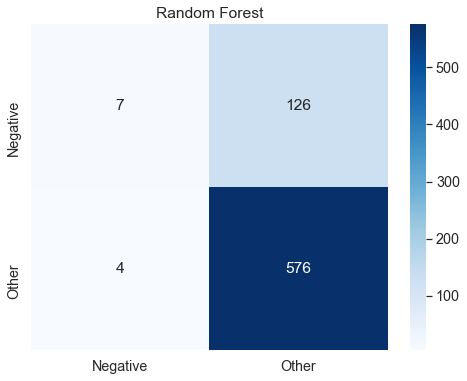

In [110]:
cm = confusion_matrix(y_test_s, y_pred)

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=s_labels, yticklabels=s_labels)
ax.set_title('Random Forest');

#### Naive Bayes Model

In [111]:
naive_sentiment = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('naive', MultinomialNB()),
              ])

naive_sentiment.fit(X_train_s, y_train_s)

naive_params = {
    'vect__strip_accents':[None,'ascii','unicode'],
    'vect__lowercase': [True, False],
    'vect__ngram_range': [(1,1), (1,2), (2,2)],
    'tfidf__smooth_idf': [True, False]

}

naive_gs = GridSearchCV(naive_sentiment, param_grid= naive_params, cv=5, verbose=1, n_jobs=-3, scoring='accuracy')

naive_gs = naive_gs.fit(X_train_s, y_train_s)

In [112]:
naive_gs.best_score_ 

In [113]:
naive_gs.best_params_

In [114]:
naive_sentiment = Pipeline([('vect', CountVectorizer(ngram_range=(1,1))),
               ('tfidf', TfidfTransformer(smooth_idf=False)),
               ('clf', MultinomialNB()),
              ])

cv_mean, accuracy, y_pred, naive_sentiment = et.run_model(X, y_sentiment, naive_sentiment)

print(f'CV Mean: {cv_mean}')
print(f'Accuracy: {accuracy}')

sentiment_models_t['Naive'] = {'CV Mean': cv_mean, 'Accuracy': accuracy}

CV Mean: 0.8157
Accuracy: 0.8247


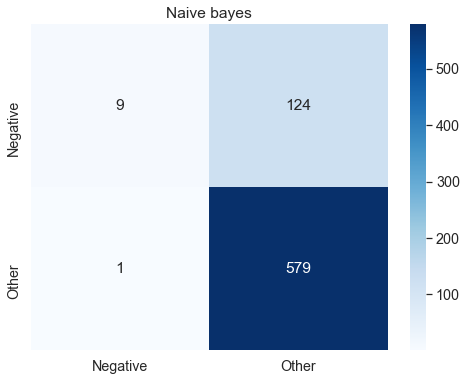

In [115]:
cm = confusion_matrix(y_test_s, y_pred)

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=s_labels, yticklabels=s_labels)
ax.set_title('Naive bayes');

#### Logistic Regression Model

In [116]:
lg_sentiment = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('lg', LogisticRegression(random_state=5)),
              ])

lg_sentiment.fit(X_train_s, y_train_s)

lg_params = {
    'vect__strip_accents':[None,'ascii','unicode'],
    'vect__lowercase': [True, False],
    'vect__ngram_range': [(1,1), (1,2), (2,2)],
    'tfidf__smooth_idf': [True, False],
    'lg__C': [1,5,10],
    'lg__solver': ['liblinear','lbfgs', 'sag', 'saga','newton-cg'],
    'lg__class_weight': ['balanced', None],
    'lg__multi_class': ['auto', 'ovr', 'multinomial'],
    'lg__penalty':['l1','l2','elasticnet', 'none']
    

}

lg_gs = GridSearchCV(lg_sentiment, param_grid= lg_params, cv=5, verbose=1, n_jobs=-3, scoring='accuracy')

lg_gs = lg_gs.fit(X_train_s, y_train_s)

In [117]:
lg_gs.best_score_ 

In [118]:
lg_gs.best_params_

In [119]:
lg_sentiment = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
               ('tfidf', TfidfTransformer(smooth_idf=False)),
               ('clf', LogisticRegression(C= 10, class_weight= None, multi_class= 'auto', penalty= 'l2', solver= 'liblinear', random_state=5)),
              ])

cv_mean, accuracy, y_pred, lg_sentiment = et.run_model(X, y_sentiment, lg_sentiment)

print(f'CV Mean: {cv_mean}')
print(f'Accuracy: {accuracy}')

sentiment_models_t['LogReg'] = {'CV Mean': cv_mean, 'Accuracy': accuracy}


CV Mean: 0.8241
Accuracy: 0.8247


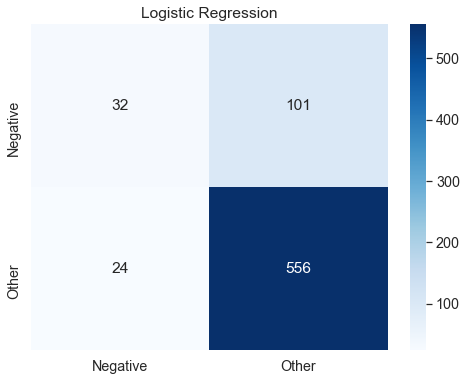

In [120]:
cm = confusion_matrix(y_test_s, y_pred)

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=s_labels, yticklabels=s_labels)
ax.set_title('Logistic Regression');

#### SVC Regression Model

In [163]:
svc_sentiment = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('svc', SVC(random_state=5)),
              ])

svc_sentiment.fit(X_train_s, y_train_s)

svc_params = {
    'vect__strip_accents':[None,'ascii','unicode'],
    'vect__lowercase': [True, False],
    'vect__ngram_range': [(1,1), (1,2), (2,2)],
    'tfidf__smooth_idf': [True, False],
    'svc__C': [1,5,10],
    'svc__kernel': ['linear','poly', 'rbf', 'sigmoid','precomputed'],
    'svc__degree': [3,6,9],
    'svc__gamma': ['auto', 'scale'],
    'svc__class_weight':[None, 'balanced']
    

}

svc_gs = GridSearchCV(svc_sentiment, param_grid= svc_params, cv=5, verbose=1, n_jobs=-3, scoring='accuracy')

svc_gs = svc_gs.fit(X_train_s, y_train_s)

Fitting 5 folds for each of 6480 candidates, totalling 32400 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=-3)]: Done  30 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-3)]: Done 180 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-3)]: Done 430 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-3)]: Done 780 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-3)]: Done 1330 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-3)]: Done 2080 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-3)]: Done 2930 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-3)]: Done 3680 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-3)]: Done 4600 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-3)]: Done 5640 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-3)]: Done 6880 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-3)]: Done 8080 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-3)]: Done 9430 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-3)]: Done 10780 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-3)]: Done 12320 tasks     

In [ ]:
svc_gs.best_score_ 

In [ ]:
svc_gs.best_params_

In [ ]:
svc_sentiment = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
               ('tfidf', TfidfTransformer(smooth_idf=False)),
               ('clf', SVC()),
              ])

cv_mean, accuracy, y_pred, svc_sentiment = et.run_model(X, y_sentiment, svc_sentiment)

print(f'CV Mean: {cv_mean}')
print(f'Accuracy: {accuracy}')

sentiment_models_t['SVC'] = {'CV Mean': cv_mean, 'Accuracy': accuracy}


In [ ]:
cm = confusion_matrix(y_test_s, y_pred)

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=s_labels, yticklabels=s_labels)
ax.set_title('Logistic Regression');

In [121]:
sentiment_models_t

{'SGD': {'CV Mean': 0.8227, 'Accuracy': 0.8233},
 'RFC': {'CV Mean': 0.8064, 'Accuracy': 0.8177},
 'Naive': {'CV Mean': 0.8157, 'Accuracy': 0.8247},
 'LogReg': {'CV Mean': 0.8241, 'Accuracy': 0.8247}}

### Target Models

In [122]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y_target, test_size= 0.25, random_state=5)

In [123]:
target_models_t = {}

#### Stochastic Gradient Descent Model

In [124]:
sgd_target = Pipeline([('vect', CountVectorizer()), 
               ('tfidf', TfidfTransformer()),
               ('sgd', SGDClassifier(random_state=5)),
              ])

sgd_target.fit(X_train_t, y_train_t)

sgd_params = {
    'vect__strip_accents':[None,'ascii','unicode'],
    'vect__lowercase': [True, False],
    'vect__ngram_range': [(1,1), (1,2), (2,2)],
    'tfidf__smooth_idf': [True, False],
    'sgd__loss': ['hinge','log','modified_huber','squared_hinge'],
    'sgd__max_iter':[1000,2000],
    'sgd__class_weight': [None, 'balanced']
}

sgd_gs = GridSearchCV(sgd_target,param_grid=sgd_params, cv=5, verbose=1, n_jobs=-3, scoring='accuracy')

sgd_gs = sgd_gs.fit(X_train_t, y_train_t)

In [125]:
sgd_gs.best_score_

In [126]:
sgd_gs.best_params_

In [127]:
sgd_target = Pipeline([('vect', CountVectorizer(ngram_range= (1,2))), 
               ('tfidf', TfidfTransformer(smooth_idf=False)),
               ('clf', SGDClassifier(loss = 'log', random_state=5)),
              ])

cv_mean, accuracy, y_pred, sgd_target = et.run_model(X, y_target, sgd_target)

print(f'CV Mean: {cv_mean}')
print(f'Accuracy: {accuracy}')

target_models_t['SGD'] = {'CV Mean': cv_mean, 'Accuracy': accuracy}

CV Mean: 0.6286
Accuracy: 0.6676


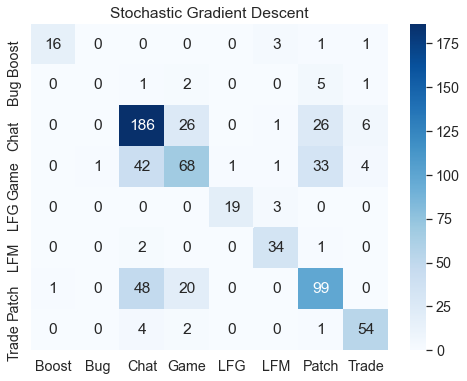

In [128]:
cm = confusion_matrix(y_test_t, y_pred)

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=t_labels, yticklabels=t_labels)
ax.set_title('Stochastic Gradient Descent');

#### Random Forest Model

In [129]:
rfc_target = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('rfc', RandomForestClassifier(random_state=5)),
              ])

rfc_target.fit(X_train_t, y_train_t)

rfc_params = {
    'vect__strip_accents':[None,'ascii','unicode'],
    'vect__lowercase': [True, False],
    'vect__ngram_range': [(1,1), (1,2), (2,2)],
    'tfidf__smooth_idf': [True, False],
    'rfc__n_estimators': [100,200,300,400,500],
    'rfc__criterion': ['gini','entropy'],
    'rfc__max_depth': [1,3,5],
    'rfc__class_weight': [None,'balanced', 'balanced_subsample']
}

rfc_gs = GridSearchCV(rfc_target, param_grid= rfc_params, cv=5, verbose=1, n_jobs=-3, scoring='accuracy')

rfc_gs = rfc_gs.fit(X_train_t, y_train_t)

In [130]:
rfc_gs.best_score_ 

In [131]:
rfc_gs.best_params_

In [133]:
rfc_target = Pipeline([('vect', CountVectorizer(strip_accents='ascii',ngram_range=(1,1))),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier(class_weight= 'balanced_subsample',
                                              criterion= 'entropy', 
                                              max_depth=5,
                                              n_estimators = 500,
                                              random_state=5))
              ])

cv_mean, accuracy, y_pred, rfc_target = et.run_model(X, y_target, rfc_target)

print(f'CV Mean: {cv_mean}')
print(f'Accuracy: {accuracy}')

target_models_t['RFC'] = {'CV Mean': cv_mean, 'Accuracy': accuracy}

CV Mean: 0.5388
Accuracy: 0.5456


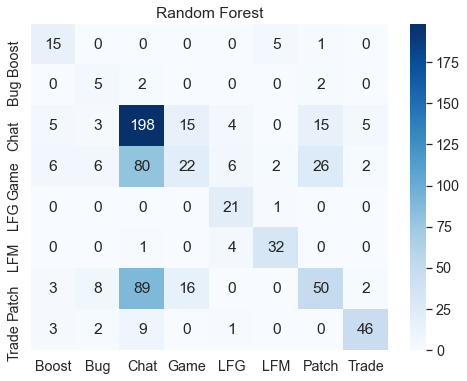

In [134]:
cm = confusion_matrix(y_test_t, y_pred)

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=t_labels, yticklabels=t_labels)
ax.set_title('Random Forest');

#### Naive Bayes Model

In [135]:
naive_target = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('naive', MultinomialNB()),
              ])

naive_target.fit(X_train_t, y_train_t)

naive_params = {
    'vect__strip_accents':[None,'ascii','unicode'],
    'vect__lowercase': [True, False],
    'vect__ngram_range': [(1,1), (1,2), (2,2)],
    'tfidf__smooth_idf': [True, False]

}

naive_gs = GridSearchCV(naive_target, param_grid= naive_params, cv=5, verbose=1, n_jobs=-3, scoring='accuracy')

naive_gs = naive_gs.fit(X_train_t, y_train_t)

In [136]:
naive_gs.best_score_ 

In [137]:
naive_gs.best_params_

In [138]:
naive_target = Pipeline([('vect', CountVectorizer(lowercase=True, strip_accents=None, ngram_range=(1,1))),
               ('tfidf', TfidfTransformer(smooth_idf=True)),
               ('clf', MultinomialNB()),
              ])

cv_mean, accuracy, y_pred, naive_target = et.run_model(X, y_target, naive_target)

print(f'CV Mean: {cv_mean}')
print(f'Accuracy: {accuracy}')

target_models_t['Naive'] = {'CV Mean': cv_mean, 'Accuracy': accuracy}

CV Mean: 0.6151
Accuracy: 0.6452


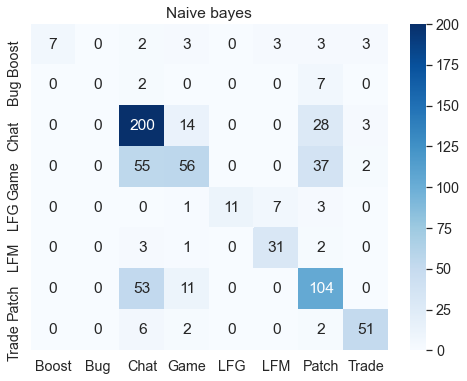

In [139]:
cm = confusion_matrix(y_test_t, y_pred)

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=t_labels, yticklabels=t_labels)
ax.set_title('Naive bayes');

#### Logistic Regression Model

In [140]:
lg_target = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('lg', LogisticRegression(random_state=5)),
              ])

lg_target.fit(X_train_t, y_train_t)

lg_params = {
    'vect__strip_accents':[None,'ascii','unicode'],
    'vect__lowercase': [True, False],
    'vect__ngram_range': [(1,1), (1,2), (2,2)],
    'tfidf__smooth_idf': [True, False],
    'lg__C': [1,5,10],
    'lg__solver': ['liblinear','lbfgs', 'sag', 'saga','newton-cg'],
    'lg__class_weight': ['balanced', None],
    'lg__multi_class': ['auto', 'ovr', 'multinomial'],
    'lg__penalty':['l1','l2','elasticnet', 'none'],
    'lg__max_iter': [100, 200, 300]
    

}

lg_gs = GridSearchCV(lg_target, param_grid= lg_params, cv=5, verbose=1, n_jobs=-3, scoring='accuracy')

lg_gs = lg_gs.fit(X_train_t, y_train_t)

In [141]:
lg_gs.best_score_ 

In [142]:
lg_gs.best_params_

In [143]:
lg_target = Pipeline([('vect', CountVectorizer(lowercase=True, ngram_range=(1,1))),
               ('tfidf', TfidfTransformer(smooth_idf=False)),
               ('clf', LogisticRegression(C= 5, max_iter=10000, class_weight= 'balanced', multi_class= 'auto', penalty= 'l2', solver= 'sag', random_state=5)),
              ])

cv_mean, accuracy, y_pred, lg_target = et.run_model(X, y_target, lg_target)

print(f'CV Mean: {cv_mean}')
print(f'Accuracy: {accuracy}')

target_models_t['LogReg'] = {'CV Mean': cv_mean, 'Accuracy': accuracy}


C:\Users\edelp\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\edelp\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\edelp\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\edelp\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\edelp\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear

CV Mean: 0.6282
Accuracy: 0.6634


C:\Users\edelp\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


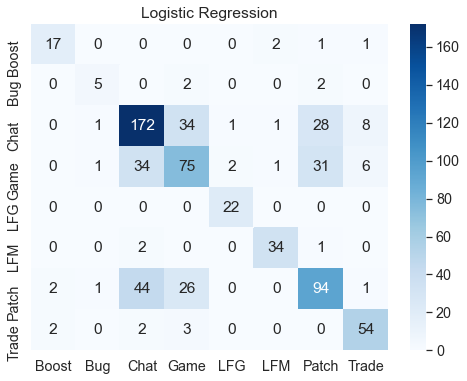

In [144]:
cm = confusion_matrix(y_test_t, y_pred)

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=t_labels, yticklabels=t_labels)
ax.set_title('Logistic Regression');

In [145]:
target_models_t

{'SGD': {'CV Mean': 0.6286, 'Accuracy': 0.6676},
 'RFC': {'CV Mean': 0.5388, 'Accuracy': 0.5456},
 'Naive': {'CV Mean': 0.6151, 'Accuracy': 0.6452},
 'LogReg': {'CV Mean': 0.6282, 'Accuracy': 0.6634}}

### Tuned Model Performance

In [146]:
s_t_model_df = pd.DataFrame()
s_tmp_labels = list(sentiment_models_t.keys())

In [147]:
model_list = []
cv_list = []
acc_list = []

for model_name in s_tmp_labels:
    cv_list.append(list(sentiment_models_t[model_name].values())[0])
    acc_list.append(list(sentiment_models_t[model_name].values())[1])

s_t_model_df['model'] = sentiment_models_t.keys()
s_t_model_df['cv_mean'] = cv_list
s_t_model_df['accuracy'] = acc_list

s_t_model_df

,model,cv_mean,accuracy
0,SGD,0.8227,0.8233
1,RFC,0.8064,0.8177
2,Naive,0.8157,0.8247
3,LogReg,0.8241,0.8247


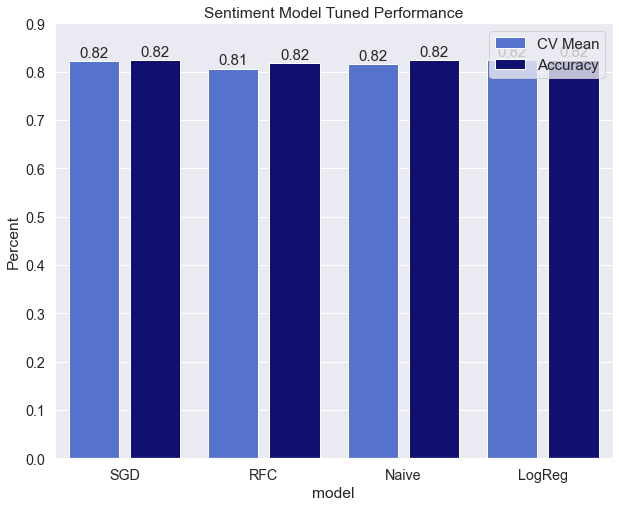

In [148]:
fig, ax = plt.subplots(figsize=(10,8))
width = .45
sns.set(font_scale = 1.3)

ax1 = sns.barplot(x='model', y='cv_mean', data=s_t_model_df, color='royalblue', label='CV Mean')

for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width)



ax2 = sns.barplot(x='model', y='accuracy', data=s_t_model_df, color='navy', label='Accuracy')

for bar in ax.containers[1]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (1- width))
    bar.set_width(w * width)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

ax.set_ylabel('Percent')
ax.set_ybound(upper= .9)
ax.legend(fontsize= 15)
ax.set_title('Sentiment Model Tuned Performance')


plt.show()

In [149]:
t_t_model_df = pd.DataFrame()
t_tmp_labels = list(target_models_t.keys())

In [150]:
model_list = []
cv_list = []
acc_list = []

for model_name in t_tmp_labels:
    cv_list.append(list(target_models_t[model_name].values())[0])
    acc_list.append(list(target_models_t[model_name].values())[1])

t_t_model_df['model'] = target_models_t.keys()
t_t_model_df['cv_mean'] = cv_list
t_t_model_df['accuracy'] = acc_list

t_t_model_df

,model,cv_mean,accuracy
0,SGD,0.6286,0.6676
1,RFC,0.5388,0.5456
2,Naive,0.6151,0.6452
3,LogReg,0.6282,0.6634


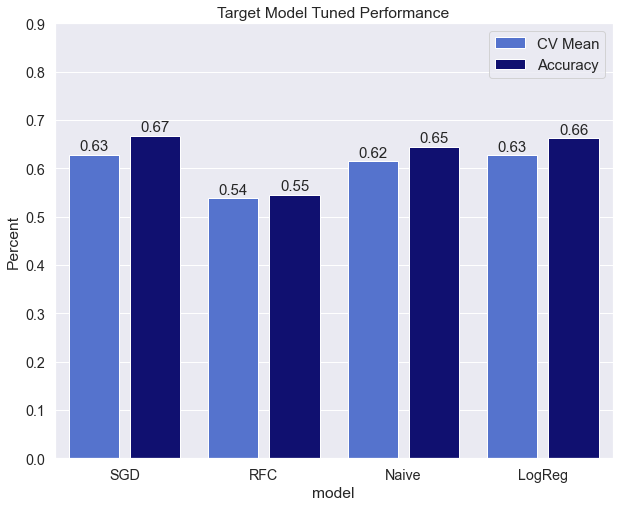

In [151]:
fig, ax = plt.subplots(figsize=(10,8))
width = .45
sns.set(font_scale = 1.3)

ax1 = sns.barplot(x='model', y='cv_mean', data=t_t_model_df, color='royalblue', label='CV Mean')

for bar in ax.containers[0]:
    bar.set_width(bar.get_width() * width)



ax2 = sns.barplot(x='model', y='accuracy', data=t_t_model_df, color='navy', label='Accuracy')

for bar in ax.containers[1]:
    x = bar.get_x()
    w = bar.get_width()
    bar.set_x(x + w * (1- width))
    bar.set_width(w * width)

for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

ax.set_ylabel('Percent')
ax.set_ybound(upper= .9)
ax.legend(fontsize= 15)
ax.set_title('Target Model Tuned Performance')


plt.show()